In [2]:
import numpy as np
import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt

from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

from sklearn.model_selection import train_test_split
import os

# 경고 메세지 무시하기
import warnings
warnings.filterwarnings('ignore')

In [3]:
from matplotlib import rc
rc('font', family='AppleGothic')

plt.rcParams['axes.unicode_minus'] = False

In [4]:
try:
    os.chdir("/Users/hwangseoyeon/opt/anaconda3/envs/krm_datascience/project/")
    print("Directory changed")
except OSError:
    print("Can't change the Current Working Directory") 

Directory changed


### 정책제안

In [25]:
do_yg = pd.read_csv('하고+싶은+여가활동_20230731135957.csv')
do_yg_1  = do_yg .rename(columns=do_yg .iloc[0])
do_yg  = do_yg_1.drop(do_yg_1.index[0])
do_yg_2 = do_yg.drop(labels=['구분별(1)','구분별(2)','기타'],axis=1)
do_yg_3 = do_yg_2.set_index('구분별(3)')
do_yg_3.to_csv('do_yg.csv')

,여행야외나들이,영상시청,문화예술관람,운동,휴식,종교활동,문화예술참여활동,컴퓨터게임인터넷검색 등,운동경기관람,사회봉사활동,독서
구분별(3),,,,,,,,,,,
소계,34.6,10.2,9.1,12.4,3.5,10.0,2.9,6.0,5.6,4.4,1.4
남자,32.7,10.1,8.8,15.0,3.5,8.5,2.5,7.1,6.5,4.0,1.2
여자,36.3,10.2,9.4,10.0,3.4,11.3,3.3,5.0,4.7,4.8,1.6
10대,27.6,5.9,14.2,9.0,4.7,4.6,3.1,20.0,5.4,4.3,1.2
20대,34.9,6.6,12.6,11.1,2.0,6.1,2.8,10.6,5.9,6.1,1.3
30대,40.1,8.5,10.4,10.6,3.6,6.6,2.9,7.3,5.6,3.7,0.8
40대,38.4,8.6,9.6,12.3,3.1,7.5,3.3,4.4,7.6,3.6,1.3
50대,36.8,9.9,7.9,12.8,4.1,10.9,2.8,3.2,5.6,4.6,1.4
60대 이상,28.4,15.3,5.7,14.7,3.9,16.3,2.7,2.7,4.2,4.3,1.8


In [23]:
#내용 float로 바꾸기
import csv

def convert_to_float(input_file, output_file):
    with open(input_file, 'r', newline='') as csvfile:
        reader = csv.reader(csvfile)
        data = list(reader)

    for i in range(1,len(data)):
        for j in range(1,len(data[i])):
            try:
                data[i][j] = float(data[i][j])
            except ValueError:
                # If the conversion to float fails (e.g., non-numeric data), you can handle it here.
                # For simplicity, we'll just leave the original value as is.
                pass

    with open(output_file, 'w', newline='') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerows(data)

# Usage example:
input_file_path = 'do_yg.csv'
output_file_path = 'do_yg_HM.csv'
convert_to_float(input_file_path, output_file_path)


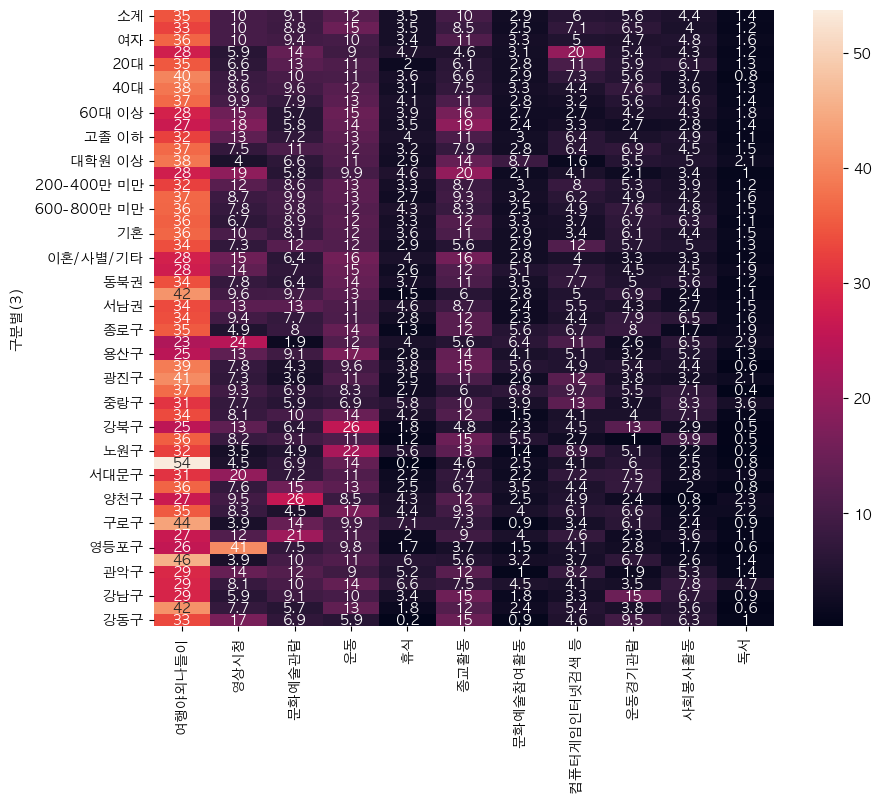

In [32]:
#하고싶은 여가활동 히트맵
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

do_yg_hm = pd.read_csv('do_yg_HM.csv')
do_yg_hm_hm = do_yg_hm.set_index('구분별(3)')

plt.rcParams['figure.figsize'] = [10, 8]
plt.rcParams['font.family'] = 'AppleGothic'

ax = sns.heatmap(do_yg_hm_hm,annot=True)
#plt.title('Heatmap of Flight by seaborn', fontsize=20)
plt.show() 

In [50]:
#데이터프레임 다시 만들기 (운동/건강 프로그램,여행 관광 등산 낚시 프로그램,문화예술관람,영상시청)
#참여도
df1 = pd.read_csv('문화활동+연간+방문횟수_20230801152338.csv')
df11 = df1.rename(columns=df1.iloc[0])
df1 = df11.drop(df11.index[0]) 
df1_관악 = df1.loc[df1['구분별(3)'] == '관악구']
df1_관악 = df1_관악.T
df1_관악= df1_관악.drop(labels=['구분별(1)','구분별(2)','구분별(3)'],axis=0)
df1_관악

,47
전시회 관람,0.13
박물관 관람,0.21
음악 및 무용발표회 관람,0.04
전통예술공연 관람,0.03
연극공연 관람,0.18
극장에서 영화관람,1.65
대중공연 관람,0.08
스포츠경기 관람,0.13


In [59]:
#선호도
df2 = pd.read_csv('하고+싶은+여가활동_20230731135957.csv')
df22 = df2.rename(columns=df2.iloc[0])
df2_2 = df22.drop(df22.index[0])
df2_관악 = df2_2.loc[df2_2['구분별(3)'] == '관악구']
df2_관악 = df2_관악.T
df2_관악 = df2_관악.drop(labels=['구분별(1)','구분별(2)','구분별(3)'],axis=0)
df2_관악

,47
여행야외나들이,29.3
영상시청,14.3
문화예술관람,11.8
운동,9.0
휴식,5.2
종교활동,12.5
문화예술참여활동,1.0
컴퓨터게임인터넷검색 등,8.2
운동경기관람,1.9
사회봉사활동,5.3


In [58]:
#노인선호도
df3 = pd.read_csv('HM.csv')
df3_관악 = df3.loc[df3['구분별(2)'] == '관악구']
df3_관악 = df3_관악.T
df3_관악 = df3_관악.drop(labels=['구분별(2)'],axis=0)
df3_관악

,42
운동/건강 프로그램,43.8
노래/오락 프로그램,10.9
새로운 지식교육/교양 프로그램,5.5
수입과 연결된 직업관련 프로그램,3.5
여행 관광 등산 낚시 프로그램,8.7
사회봉사활동,2.8
사교 프로그램,0.9
전통문화 프로그램,0.1
없음,23.9


In [24]:
#시설
wf = pd.read_csv('welfare policy.csv',encoding='cp949',sep=',')
wf = wf.iloc[0:6]
wf.columns = ['활동','참여도','선호도',	'시설수','만족도','예방효과']
wf['활동'] = wf['활동'].str.replace('\t',' ')
wf

,활동,참여도,선호도,시설수,만족도,예방효과
0,운동/건강 프로그램,9.00,43.8,78,0.23,0.326
1,스포츠경기 관람,0.13,1.9,76,0.20,0.120
2,극장에서 영화관람,1.65,14.3,13,0.60,0.100
3,사회봉사,0.06,2.8,64,0.10,0.070
4,새로운 지식교육/교양 프로그램,0.21,5.5,76,0.19,0.210
5,문화예술참여활동,0.03,11.8,77,0.20,0.120


In [6]:
wf_1 = wf.set_index('활동')
wf_1.corr()

,참여도,선호도,시설수,만족도,예방효과
참여도,1.000000,0.972087,0.102039,0.106004,0.841631
선호도,0.972087,1.000000,0.062915,0.176056,0.815713
시설수,0.102039,0.062915,1.000000,-0.898092,0.412224
만족도,0.106004,0.176056,-0.898092,1.000000,-0.117528
예방효과,0.841631,0.815713,0.412224,-0.117528,1.000000


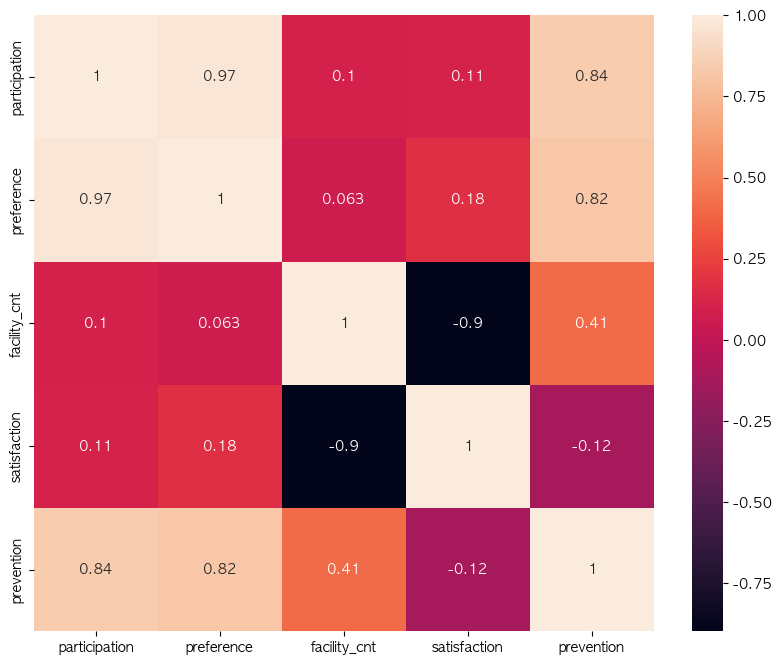

In [7]:
#히트맵
plt.rcParams['figure.figsize'] = [10, 8]
plt.rcParams['font.family'] = 'AppleGothic'

ax = sns.heatmap(wf_1.corr(),annot=True)
#plt.title('Heatmap of Flight by seaborn', fontsize=20)
plt.show() 

의미 없어보이는 facilit_cnt 변수 제거

In [8]:
wf_1.describe()

,participation,preference,facility_cnt,satisfaction,prevention
count,6.000000,6.000000,6.000000,6.000000,6.000000
mean,1.846667,13.350000,64.000000,0.253333,0.157667
std,3.558846,15.713275,25.510782,0.175461,0.094787
min,0.030000,1.900000,13.000000,0.100000,0.070000
25%,0.077500,3.475000,67.000000,0.192500,0.105000
50%,0.170000,8.650000,76.000000,0.200000,0.120000
75%,1.290000,13.675000,76.750000,0.222500,0.187500
max,9.000000,43.800000,78.000000,0.600000,0.326000


In [7]:
wf_random = wf.drop(['활동'],axis=1)
wf_random

,참여도,선호도,시설수,만족도,예방효과
0,9.00,43.8,78,0.23,0.326
1,0.13,1.9,76,0.20,0.120
2,1.65,14.3,13,0.60,0.100
3,0.06,2.8,64,0.10,0.070
4,0.21,5.5,76,0.19,0.210
5,0.03,11.8,77,0.20,0.120


In [12]:
#randeomforestregressor
from sklearn.ensemble import RandomForestRegressor

x = wf_random.drop(["예방효과"], axis = 1)
y = wf_random["예방효과"]
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state = 0, shuffle = True)

forest_model = RandomForestRegressor(n_estimators=15000).fit(x_train, y_train)

pd.DataFrame(forest_model.feature_importances_, x_train.columns)

,0
참여도,0.308452
선호도,0.311000
시설수,0.175273
만족도,0.205275


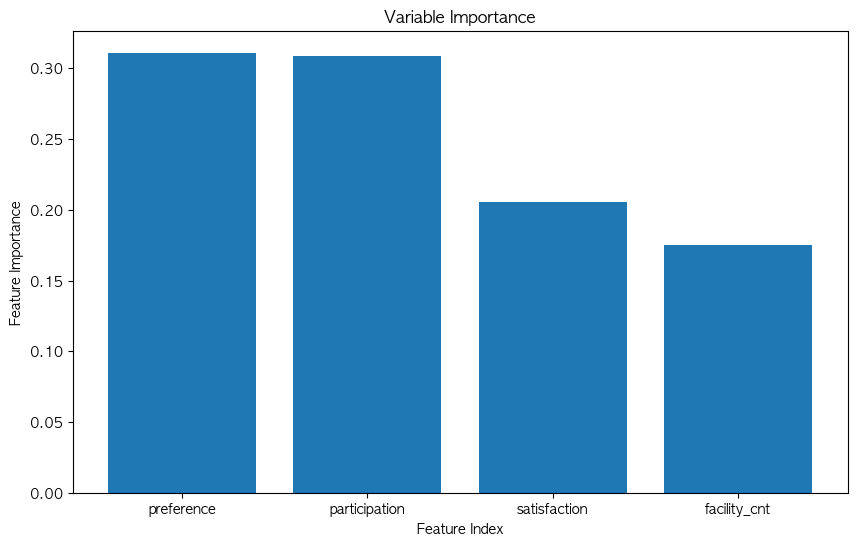

In [14]:
# 그래프로 표현
sorted_idx = np.argsort(forest_model.feature_importances_)[::-1]
feature_names = ['participation', 'preference', 'facility_cnt', 'satisfaction']

plt.figure(figsize=(10, 6))
plt.bar(range(len(forest_model.feature_importances_)), forest_model.feature_importances_[sorted_idx], align='center')
#plt.xticks(range(len(forest_model.feature_importances_)), sorted_idx)  # x축에 변수 이름을 표시하는 경우
plt.xticks(range(len(forest_model.feature_importances_)), [feature_names[i] for i in sorted_idx])  # 변수 이름을 직접 표시하는 경우
plt.xlabel('Feature Index')
plt.ylabel('Feature Importance')
plt.title('Variable Importance')
plt.show()

In [15]:
from sklearn.metrics import mean_squared_error

forest_pred = forest_model.predict(x_train)
forest_mse = mean_squared_error(y_train,forest_pred)

print('r^2: ',forest_model.score(x_train,y_train))
print('mse: ',forest_mse)

r^2:  0.9048519173121017
mse:  0.0009016945926125406


In [16]:
#gradientboostingregressor
from sklearn.ensemble import GradientBoostingRegressor

Gradient_model = GradientBoostingRegressor(n_estimators=15000).fit(x_train, y_train)
pd.DataFrame(Gradient_model.feature_importances_, x_train.columns)

,0
참여도,0.168879
선호도,0.694271
시설수,0.105278
만족도,0.031572


여기서도 시설개수는 별로 안중요해보임 --> 삭제

In [25]:
wf = wf.drop('시설수',axis=1)
wf

,활동,참여도,선호도,만족도,예방효과
0,운동/건강 프로그램,9.00,43.8,0.23,0.326
1,스포츠경기 관람,0.13,1.9,0.20,0.120
2,극장에서 영화관람,1.65,14.3,0.60,0.100
3,사회봉사,0.06,2.8,0.10,0.070
4,새로운 지식교육/교양 프로그램,0.21,5.5,0.19,0.210
5,문화예술참여활동,0.03,11.8,0.20,0.120


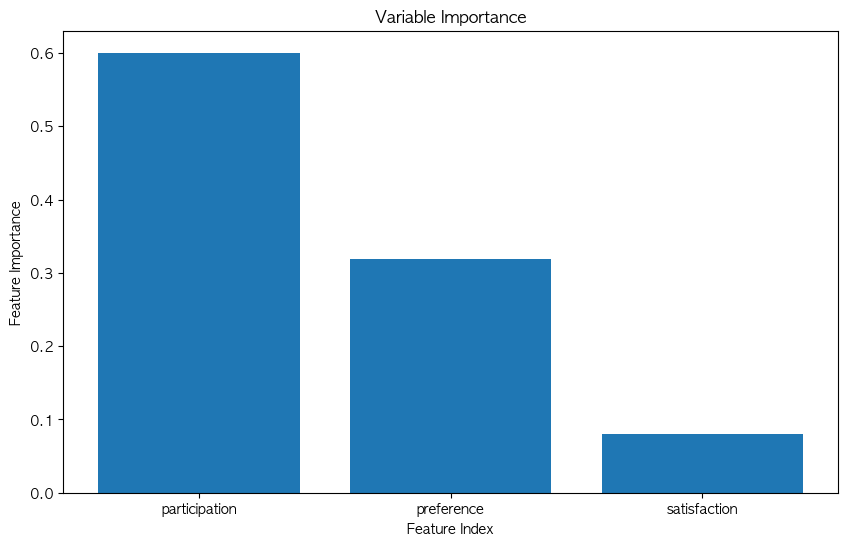

In [19]:
# 그래프로 표현
sorted_idx = np.argsort(Gradient_model.feature_importances_)[::-1]
feature_names = ['participation', 'preference', 'satisfaction']

plt.figure(figsize=(10, 6))
plt.bar(range(len(Gradient_model.feature_importances_)), Gradient_model.feature_importances_[sorted_idx], align='center')
#plt.xticks(range(len(Gradient_model.feature_importances_)), sorted_idx)  # x축에 변수 이름을 표시하는 경우
plt.xticks(range(len(Gradient_model.feature_importances_)), [feature_names[i] for i in sorted_idx])  # 변수 이름을 직접 표시하는 경우
plt.xlabel('Feature Index')
plt.ylabel('Feature Importance')
plt.title('Variable Importance')
plt.show()

In [22]:
from sklearn.metrics import mean_squared_error

Gradient_model_pred = Gradient_model.predict(x_train)
Gradient_model_mse = mean_squared_error(y_train,forest_pred)

print('r^2: ',Gradient_model.score(x_train,y_train))
print('mse: ',Gradient_model_mse)

r^2:  0.9999999999999781
mse:  0.000919305032861474


participation	0.312128
preference	0.315889
facility_cnt	0.166751
satisfaction	0.205233

In [18]:
wff = wf.drop('예방효과',axis=1)
wff

,활동,참여도,선호도,만족도
0,운동/건강 프로그램,9.00,43.8,0.23
1,스포츠경기 관람,0.13,1.9,0.20
2,극장에서 영화관람,1.65,14.3,0.60
3,사회봉사,0.06,2.8,0.10
4,새로운 지식교육/교양 프로그램,0.21,5.5,0.19
5,문화예술참여활동,0.03,11.8,0.20


예방효과
0	운동/건강 프로그램	9.00	43.8	0.23	0.326
1	스포츠경기 관람	0.13	1.9	0.20	0.120
2	극장에서 영화관람	1.65	14.3	0.60	0.100
3	사회봉사	0.06	2.8	0.10	0.070
4	새로운 지식교육/교양 프로그램	0.21	5.5	0.19	0.210
5	문화예술참여활동	0.03	11.8	0.20	0.120

In [29]:
#참여도 , 선호도, 만족도, 예방효과
df2 = pd.DataFrame({
    '활동' : ['여행야외나들이', '전통문화 프로그램','컴퓨터게임인터넷검색 등'] ,
     '참여도': [6.0,0.4,5.7],
     '선호도' : [29.3,10.3,23.2],
     '만족도' : [0.2,0.2,0.4],
     '예방효과' : [0.3,0.1,0.1]})

wf_final = pd.concat([wf,df2],  ignore_index=True)

wf_fin = wf_final.set_index('활동')
wf_fin

,참여도,선호도,만족도,예방효과
활동,,,,
운동/건강 프로그램,9.00,43.8,0.23,0.326
스포츠경기 관람,0.13,1.9,0.20,0.120
극장에서 영화관람,1.65,14.3,0.60,0.100
사회봉사,0.06,2.8,0.10,0.070
새로운 지식교육/교양 프로그램,0.21,5.5,0.19,0.210
문화예술참여활동,0.03,11.8,0.20,0.120
여행야외나들이,6.00,29.3,0.20,0.300
전통문화 프로그램,0.40,10.3,0.20,0.100
컴퓨터게임인터넷검색 등,5.70,23.2,0.40,0.100


In [30]:
#randeomforestregressor
#gradientboostingregressor
from sklearn.ensemble import GradientBoostingRegressor

x = wf_fin.drop(["예방효과"], axis = 1)
y = wf_fin["예방효과"]
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state = 0, shuffle = True)

Gradient_model = GradientBoostingRegressor(n_estimators=15000).fit(x_train, y_train)
pd.DataFrame(Gradient_model.feature_importances_, x_train.columns)

,0
참여도,0.603150
선호도,0.226310
만족도,0.170541


In [ ]:
#gradientboostingregressor
from sklearn.ensemble import GradientBoostingRegressor

Gradient_model = GradientBoostingRegressor(n_estimators=15000).fit(x_train, y_train)
pd.DataFrame(Gradient_model.feature_importances_, x_train.columns)

In [34]:
#만족도 계산
wf_final['적합도'] = (wf_final['participation'] * 0.312128 + wf_final['preference'] * 0.315889 +  wf_final['participation']*0.205233)
wf_final.sort_values(by=['적합도'],ascending=False)
wf_final.to_csv('정책제안최종.csv')

In [65]:
wf_f =wf_final.set_index('활동')
q = wf_f.drop('satisfaction',axis=1)
ww_f = q.drop('만족도',axis=1)
ww_f.to_csv('만족도뺀.csv')

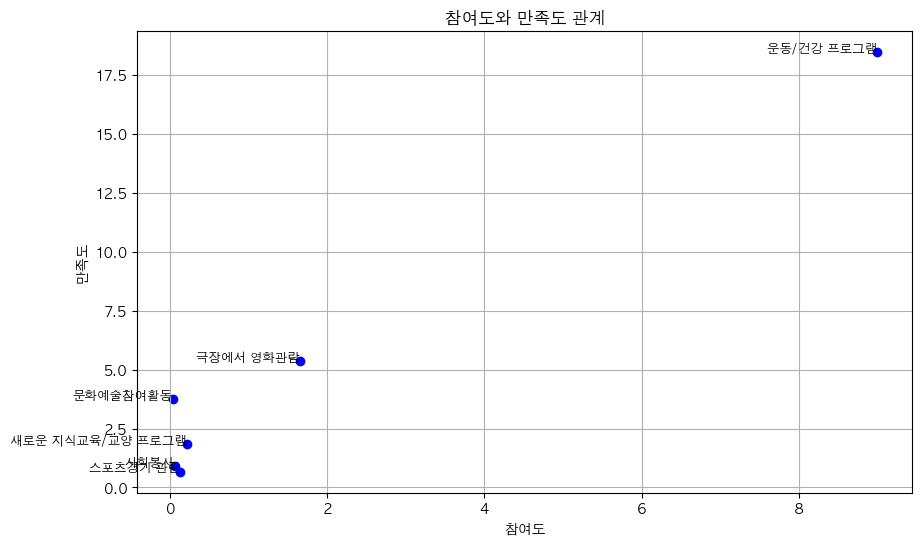

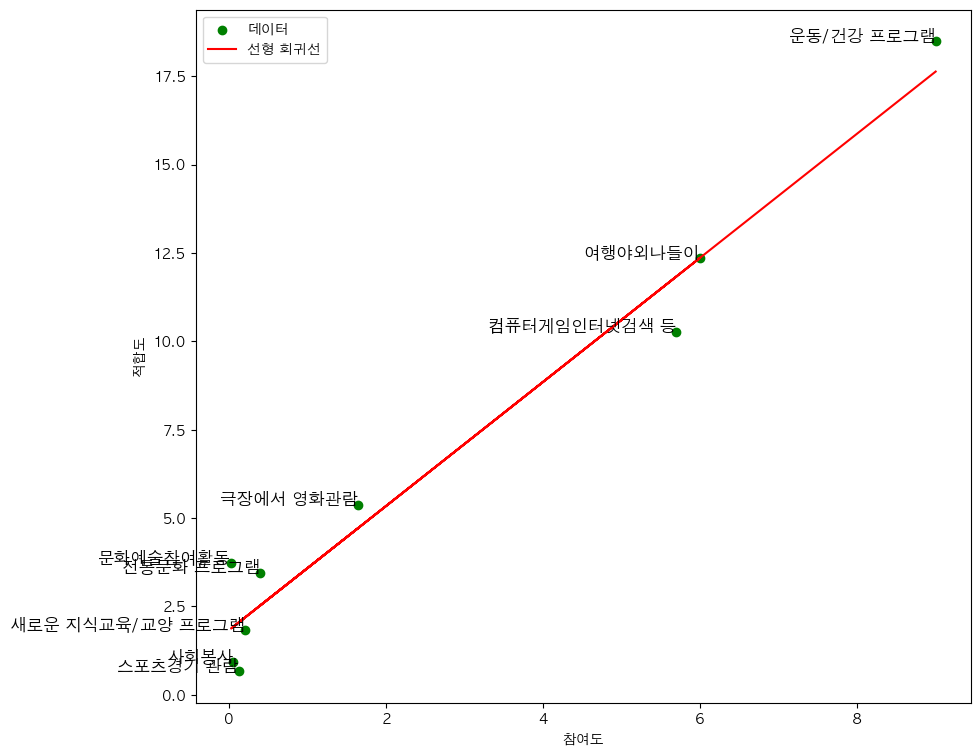

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# 기존 데이터
data = {
    '활동': ['운동/건강 프로그램', '스포츠경기 관람', '극장에서 영화관람', '사회봉사', '새로운 지식교육/교양 프로그램', '문화예술참여활동',
             '여행야외나들이', '전통문화 프로그램', '컴퓨터게임인터넷검색 등'],
    '참여도': [9.00, 0.13, 1.65, 0.06, 0.21, 0.03, 6.00, 0.40, 5.70],
    '적합도': [18.492187, 0.667446, 5.370858, 0.915531, 1.846035, 3.743011, 12.359714, 3.460601, 10.277582]
}

# DataFrame 생성
df = pd.DataFrame(data)
df.set_index('활동', inplace=True)

# 선형 회귀 분석
slope, intercept, r_value, p_value, std_err = linregress(df['참여도'], df['적합도'])
regression_line = slope * df['참여도'] + intercept

# 그래프 생성
plt.figure(figsize=(10, 9))
plt.scatter(df['참여도'], df['적합도'], color='green', marker='o', label='데이터')
plt.plot(df['참여도'], regression_line, color='red', label='선형 회귀선')
plt.xlabel('참여도')
plt.ylabel('적합도')
plt.legend()

# 각 점에 활동명 표시
for i, row in df.iterrows():
    plt.text(row['참여도'], row['적합도'], i, fontsize=12, ha='right')

#plt.grid(True)
plt.show()


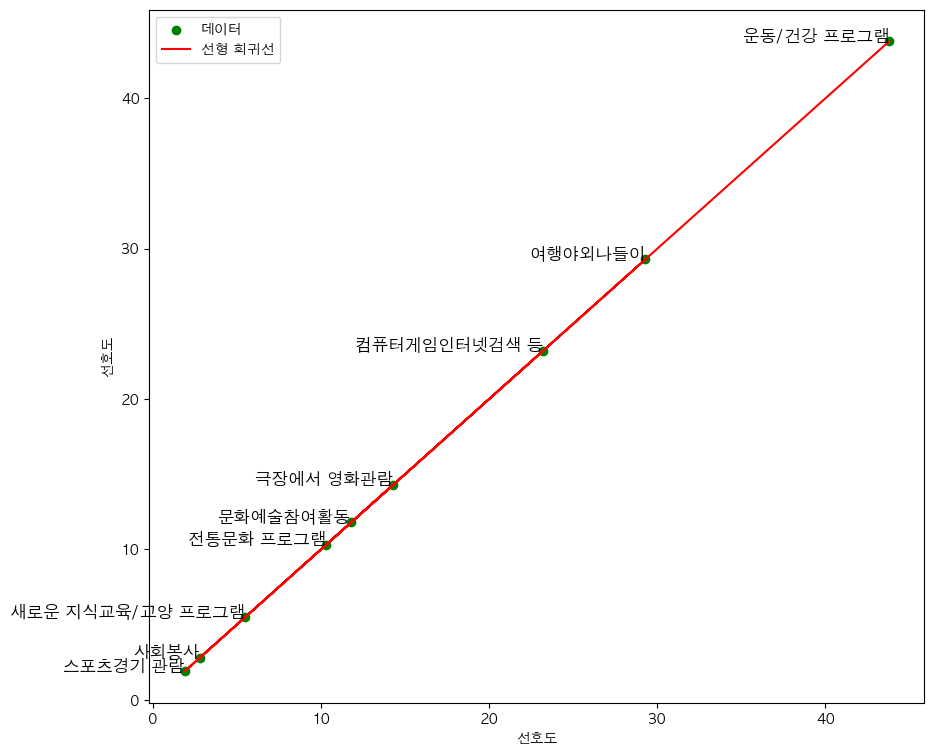

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# 기존 데이터
data = {
    '활동': ['운동/건강 프로그램', '스포츠경기 관람', '극장에서 영화관람', '사회봉사', '새로운 지식교육/교양 프로그램', '문화예술참여활동',
             '여행야외나들이', '전통문화 프로그램', '컴퓨터게임인터넷검색 등'],
    '참여도': [9.00, 0.13, 1.65, 0.06, 0.21, 0.03, 6.00, 0.40, 5.70],
    '선호도': [43.8, 1.9, 14.3, 2.8, 5.5, 11.8, 29.3, 10.3, 23.2]
}

# DataFrame 생성
df = pd.DataFrame(data)
df.set_index('활동', inplace=True)

# 선형 회귀 분석
slope, intercept, r_value, p_value, std_err = linregress(df['선호도'], df['선호도'])
regression_line = slope * df['선호도'] + intercept

# 그래프 생성
plt.figure(figsize=(10, 9))
plt.scatter(df['선호도'], df['선호도'], color='green', marker='o', label='데이터')
plt.plot(df['선호도'], regression_line, color='red', label='선형 회귀선')
#plt.title('선호도와 적합도 관계')
plt.xlabel('선호도')
plt.ylabel('선호도')
plt.legend()

# 각 점에 활동명 표시
for i, row in df.iterrows():
    plt.text(row['선호도'], row['선호도'], i, fontsize=12, ha='right')

#plt.grid(True)
plt.show()


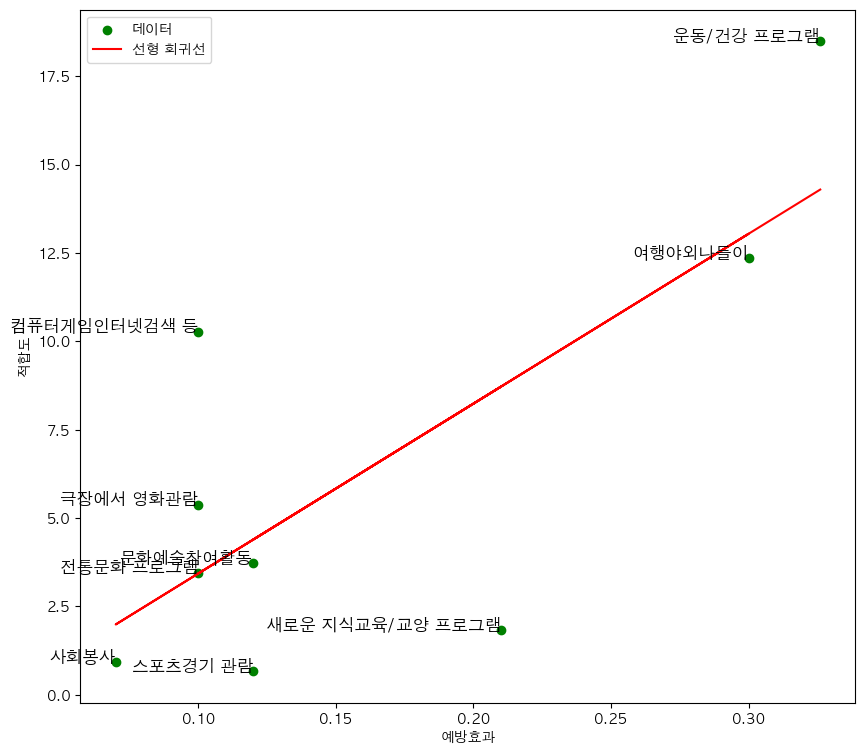

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# 기존 데이터
data = {
    '활동': ['운동/건강 프로그램', '스포츠경기 관람', '극장에서 영화관람', '사회봉사', '새로운 지식교육/교양 프로그램', '문화예술참여활동',
             '여행야외나들이', '전통문화 프로그램', '컴퓨터게임인터넷검색 등'],
    '참여도': [9.00, 0.13, 1.65, 0.06, 0.21, 0.03, 6.00, 0.40, 5.70],
    '예방효과': [0.326, 0.120, 0.100, 0.070, 0.210, 0.120, 0.300, 0.100, 0.100],
    '적합도': [18.492187, 0.667446, 5.370858, 0.915531, 1.846035, 3.743011, 12.359714, 3.460601, 10.277582]
}

# DataFrame 생성
df = pd.DataFrame(data)
df.set_index('활동', inplace=True)

# 선형 회귀 분석
slope, intercept, r_value, p_value, std_err = linregress(df['예방효과'], df['적합도'])
regression_line = slope * df['예방효과'] + intercept

# 그래프 생성
plt.figure(figsize=(10, 9))
plt.scatter(df['예방효과'], df['적합도'], color='green', marker='o', label='데이터')
plt.plot(df['예방효과'], regression_line, color='red', label='선형 회귀선')
#plt.title('예방효과와 적합도 관계')
plt.xlabel('예방효과')
plt.ylabel('적합도')
plt.legend()

# 각 점에 활동명 표시
for i, row in df.iterrows():
    plt.text(row['예방효과'], row['적합도'], i, fontsize=12, ha='right')

#plt.grid(True)
plt.show()


In [58]:
#p-value
import pandas as pd
from scipy.stats import linregress

# 기존 데이터
data = {
    '활동': ['운동/건강 프로그램', '스포츠경기 관람', '극장에서 영화관람', '사회봉사', '새로운 지식교육/교양 프로그램', '문화예술참여활동',
             '여행야외나들이', '전통문화 프로그램', '컴퓨터게임인터넷검색 등'],
    '참여도': [9.00, 0.13, 1.65, 0.06, 0.21, 0.03, 6.00, 0.40, 5.70],
    '예방효과': [0.326, 0.120, 0.100, 0.070, 0.210, 0.120, 0.300, 0.100, 0.100],
    '선호도': [43.8, 1.9, 14.3, 2.8, 5.5, 11.8, 29.3, 10.3, 23.2],
    '적합도': [18.492187, 0.667446, 5.370858, 0.915531, 1.846035, 3.743011, 12.359714, 3.460601, 10.277582]
}

# DataFrame 생성
df = pd.DataFrame(data)
df.set_index('활동', inplace=True)

# 선형 회귀 분석
slope, intercept, r_value, p_value, std_err = linregress(df['선호도'], df['적합도'])

print("p-value:", p_value)

p-value: 4.860806417927726e-09


In [66]:
x = ww_f.drop(["적합도"], axis = 1)
y = ww_f["적합도"]
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.9, random_state = 0, shuffle = True)

In [68]:
#randeomforestregressor
from sklearn.ensemble import RandomForestRegressor

forest_model = RandomForestRegressor(n_estimators=15000).fit(x_train, y_train)

pd.DataFrame(forest_model.feature_importances_, x_train.columns)

,0
participation,0.409751
preference,0.448647
prevention,0.141602


In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(x_train, y_train)

print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

# 테스트 데이터로 예측
y_pred = model.predict(x_test)

# 평가 지표 (MSE) 계산
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Coefficients: [5.17361000e-01 3.15889000e-01 3.45101552e-16 4.82274810e-15]
Intercept: 2.6645352591003757e-15
Mean Squared Error: 1.9721522630525295e-31


In [35]:
#여러 여가활동 유형의 만족도를 모델을 활용하여 예측 후 상위 5개 추천
test_da = pd.read_csv('여가활동조사.csv')
test_da['만족도'] = 0
test_data = test_da.set_index('여가활동유형')
test_data

,participation,preference,satisfaction,prevention,만족도
여가활동유형,,,,,
전시회 관람,2,6,3,2,0
박물관 관람,3,6,3,2,0
음악연주회 관람,1,6,3,3,0
전통예술공연 관람,1,6,3,2,0
연극공연관람,1,6,3,4,0
무용공연 관람,1,6,3,2,0
영화보기,7,7,10,3,0
연예공연관람,1,3,3,2,0
문학행사참여,3,6,5,4,0


In [36]:
x_test= test_data.drop(["만족도"], axis = 1)
y =test_data["만족도"]

predictions = model.predict(x_test)

print(predictions)

[2.930056 3.447417 2.412695 2.412695 2.412695 2.412695 5.83275  1.465028
 3.447417 2.096806 2.614167 2.412695 1.982389 2.49975  2.815639 5.516861
 1.6665   1.6665   3.648889 4.16625  3.648889 3.648889 5.718333 4.16625
 3.131528 2.614167 2.096806 2.096806 3.648889 3.648889 2.614167 4.482139
 7.297778 5.947167 6.780417 1.350611 2.614167 6.666    2.614167 1.867972
 1.350611 6.666   ]


In [41]:
test_data['만족도'] = predictions
test_data.sort_values(by=['만족도'],ascending=False)

,participation,preference,satisfaction,prevention,만족도
여가활동유형,,,,,
자연명승 및 풍경관람,8,10,9,3,7.297778
소풍/야유회,7,10,8,5,6.780417
등산,8,8,10,4,6.666000
산책및걷기,8,8,10,3,6.666000
삼림욕,6,9,7,5,5.947167
영화보기,7,7,10,3,5.832750
골프,8,5,8,4,5.718333
스포츠경기간접관람,7,6,4,1,5.516861
문화유적방문,5,6,1,2,4.482139
